# VTK tools

Pygslib use VTK:

 - as data format and data converting tool
 - to plot in 3D
 - as a library with some basic computational geometry functions, for example to know if a point is inside a surface


Some of the functions in VTK were obtained or modified from Adamos Kyriakou at https://pyscience.wordpress.com/


In [1]:
import pygslib as gslib 
import numpy as np

## Functions in vtktools

In [2]:
help(gslib.vtktools)

Help on module pygslib.vtktools in pygslib:

NAME
    pygslib.vtktools - PyGSLIB vtktools, Module with tools to work with VTK.

FILE
    /home/adrian/bitbucket/public/pygslib/pygslib/vtktools.so

DESCRIPTION
    Copyright (C) 2015 Adrian Martinez Vargas 
    
    This program is free software; you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation; either version 3 of the License, or
    any later version.
       
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
       
    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>

FUNCTIONS
    addLine(...)
        addLine(renderer, 
                 p1,
                

## Load a cube defined in an stl file and plot it

STL is a popular mesh format included an many non-commercial and commercial software, example: Paraview, Datamine Studio, etc. 


In [3]:
#load the cube 
mycube=gslib.vtktools.loadSTL('../datasets/stl/cube.stl')

# see the information about this data... Note that it is an vtkPolyData
print mycube

vtkPolyData (0x3808620)
  Debug: Off
  Modified Time: 183
  Reference Count: 1
  Registered Events: (none)
  Information: 0x3e22b90
  Data Released: False
  Global Release Data: Off
  UpdateTime: 184
  Field Data:
    Debug: Off
    Modified Time: 144
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 8
  Number Of Cells: 12
  Cell Data:
    Debug: Off
    Modified Time: 152
    Reference Count: 1
    Registered Events: 
      Registered Observers:
        vtkObserver (0x3d924d0)
          Event: 33
          EventName: ModifiedEvent
          Command: 0x338eff0
          Priority: 0
          Tag: 1
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
    Interpolate Flags: ( 1 1 1 1 1 0 0 1 )
    Pass Through Flags: ( 1 1 1 1 1 1 1 1 )
    Scalars: (none)
    Vectors: (none)
    Normals: (none)
    TCoords: (none)
    Tenso

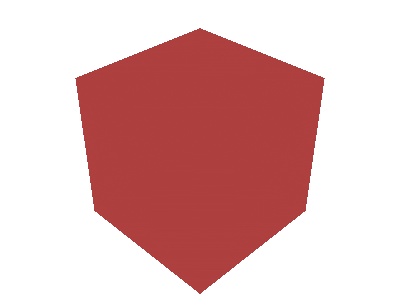

In [4]:
# Create a VTK render containing a surface (mycube)
renderer = gslib.vtktools.polydata2renderer(mycube, color=(1,0,0), opacity=0.50, background=(1,1,1))
# Now we plot the render
gslib.vtktools.vtk_show(renderer, camera_position=(-20,20,20), camera_focalpoint=(0,0,0))

## Ray casting to find intersections of a lines with the cube   

This is basically how we plan to find points inside solid and to define blocks inside solid

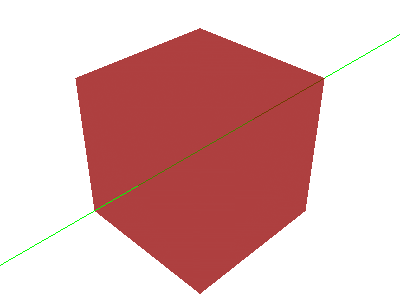

In [5]:
# we have a line, for example a block model row 
# defined by two points or an infinite line passing trough a dillhole sample 
pSource = [-50.0, 0.0, 0.0]
pTarget = [50.0, 0.0, 0.0]

# now we want to see how this looks like
gslib.vtktools.addLine(renderer,pSource, pTarget, color=(0, 1, 0))
gslib.vtktools.vtk_show(renderer) # the camera position was already defined 


In [6]:
# now we find the point coordinates of the intersections 
intersect, points, pointsVTK= gslib.vtktools.vtk_raycasting(mycube, pSource, pTarget)

print "the line intersects? ", intersect==1
print "the line is over the surface?", intersect==-1

# list of coordinates of the points intersecting 
print points


the line intersects?  True
the line is over the surface? False
[(-5.0, 0.0, 0.0), (5.0, 0.0, 0.0)]


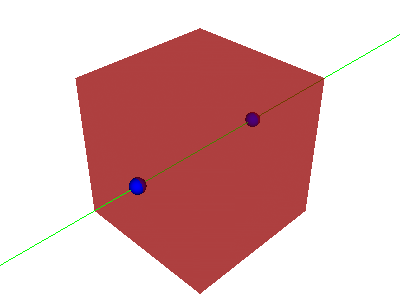

In [7]:
#Now we plot the intersecting points

# To do this we add the points to the renderer 
for p in points: 
    gslib.vtktools.addPoint(renderer, p, radius=0.5, color=(0.0, 0.0, 1.0))

gslib.vtktools.vtk_show(renderer)    
    

# Finding points

In [8]:
#using same cube but generation arbitrary random points
x = np.random.uniform(-10,10,150)
y = np.random.uniform(-10,10,150)
z = np.random.uniform(-10,10,150)

## Find points inside a solid

In [9]:
# selecting all inside the solid
# This two methods are equivelent but test=4 also works with open surfaces  
inside,p=gslib.vtktools.pointquering(mycube, azm=0, dip=0, x=x, y=y, z=z, test=1)
inside1,p=gslib.vtktools.pointquering(mycube, azm=0, dip=0, x=x, y=y, z=z, test=4)
err=inside==inside1
#print inside, tuple(p)
print x[~err]
print y[~err]
print z[~err]

[]
[]
[]


In [10]:
# here we prepare to plot the solid, the x,y,z indicator and we also 
# plot the line (direction) used to ray trace

# convert the data in the STL file into a renderer and then we plot it
renderer = gslib.vtktools.polydata2renderer(mycube, color=(1,0,0), opacity=0.70, background=(1,1,1))
# add indicator (r->x, g->y, b->z)
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-7,-10,-10], color=(1, 0, 0))
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-10,-7,-10], color=(0, 1, 0))
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-10,-10,-7], color=(0, 0, 1))

# add ray to see where we are pointing
gslib.vtktools.addLine(renderer, (0.,0.,0.), tuple(p), color=(0, 0, 0))


(vtkOpenGLRenderer)0x7ff05b142bf0

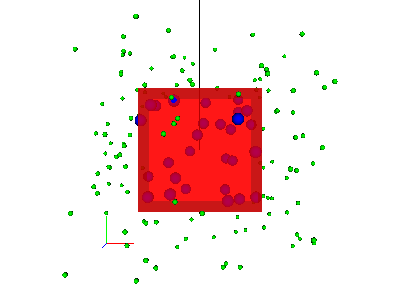

In [11]:
# here we plot the points selected and non-selected in different color and size
# add the points selected
for i in range(len(inside)):
    p=[x[i],y[i],z[i]]
    
    if inside[i]!=0:
        #inside
        gslib.vtktools.addPoint(renderer, p, radius=0.5, color=(0.0, 0.0, 1.0))
    else:
        gslib.vtktools.addPoint(renderer, p, radius=0.2, color=(0.0, 1.0, 0.0))

        
#lets rotate a bit this
gslib.vtktools.vtk_show(renderer, camera_position=(0,0,50), camera_focalpoint=(0,0,0))

# Find points over a surface

In [12]:
# selecting all over a solid (test = 2) 
inside,p=gslib.vtktools.pointquering(mycube, azm=0, dip=0, x=x, y=y, z=z, test=2)

# here we prepare to plot the solid, the x,y,z indicator and we also 
# plot the line (direction) used to ray trace

# convert the data in the STL file into a renderer and then we plot it
renderer = gslib.vtktools.polydata2renderer(mycube, color=(1,0,0), opacity=0.70, background=(1,1,1))
# add indicator (r->x, g->y, b->z)
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-7,-10,-10], color=(1, 0, 0))
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-10,-7,-10], color=(0, 1, 0))
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-10,-10,-7], color=(0, 0, 1))

# add ray to see where we are pointing
gslib.vtktools.addLine(renderer, (0.,0.,0.), tuple(-p), color=(0, 0, 0))


(vtkOpenGLRenderer)0x7ff05b142830

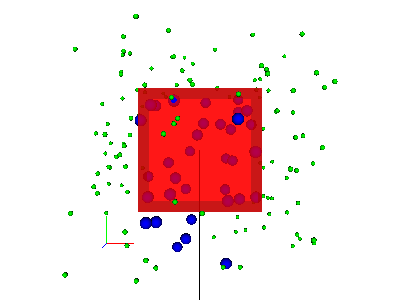

In [13]:
# here we plot the points selected and non-selected in different color and size
# add the points selected
for i in range(len(inside)):
    p=[x[i],y[i],z[i]]
    
    if inside[i]!=0:
        #inside
        gslib.vtktools.addPoint(renderer, p, radius=0.5, color=(0.0, 0.0, 1.0))
    else:
        gslib.vtktools.addPoint(renderer, p, radius=0.2, color=(0.0, 1.0, 0.0))

        
#lets rotate a bit this
gslib.vtktools.vtk_show(renderer, camera_position=(0,0,50), camera_focalpoint=(0,0,0))

# Find points below a surface

In [14]:
# selecting all over a solid (test = 2) 
inside,p=gslib.vtktools.pointquering(mycube, azm=0, dip=0, x=x, y=y, z=z, test=3)

# here we prepare to plot the solid, the x,y,z indicator and we also 
# plot the line (direction) used to ray trace

# convert the data in the STL file into a renderer and then we plot it
renderer = gslib.vtktools.polydata2renderer(mycube, color=(1,0,0), opacity=0.70, background=(1,1,1))
# add indicator (r->x, g->y, b->z)
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-7,-10,-10], color=(1, 0, 0))
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-10,-7,-10], color=(0, 1, 0))
gslib.vtktools.addLine(renderer,[-10,-10,-10], [-10,-10,-7], color=(0, 0, 1))

# add ray to see where we are pointing
gslib.vtktools.addLine(renderer, (0.,0.,0.), tuple(p), color=(0, 0, 0))


(vtkOpenGLRenderer)0x7ff05b142c50

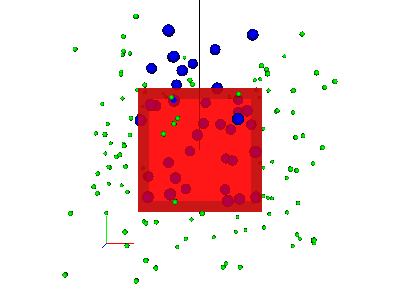

In [15]:
# here we plot the points selected and non-selected in different color and size
# add the points selected
for i in range(len(inside)):
    p=[x[i],y[i],z[i]]
    
    if inside[i]!=0:
        #inside
        gslib.vtktools.addPoint(renderer, p, radius=0.5, color=(0.0, 0.0, 1.0))
    else:
        gslib.vtktools.addPoint(renderer, p, radius=0.2, color=(0.0, 1.0, 0.0))

        
#lets rotate a bit this
gslib.vtktools.vtk_show(renderer, camera_position=(0,0,50), camera_focalpoint=(0,0,0))